In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [6]:
lodging = pd.read_csv('Housing Price.csv')
lodging.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,NaN,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,NaN,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
lodging.shape

(545, 13)

In [8]:
lodging.isnull().sum()

price               0
area                9
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
lodging1 = lodging.dropna(axis=0, subset = ['area'])
lodging.shape

(545, 13)

In [10]:
print("There is duplicate row:", lodging.duplicated().any())

There is duplicate row: False


In [11]:
lodging1 = pd.get_dummies(lodging, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'])
print(lodging1.head())

      price    area  bedrooms  bathrooms  stories  parking furnishingstatus  \
0  13300000  7420.0         4          2        3        2        furnished   
1  12250000  8960.0         4          4        4        3        furnished   
2  12250000  9960.0         3          2        2        2   semi-furnished   
3  12215000     NaN         4          2        2        3        furnished   
4  11410000     NaN         4          1        2        2        furnished   

   mainroad_no  mainroad_yes  guestroom_no  guestroom_yes  basement_no  \
0        False          True          True          False         True   
1        False          True          True          False         True   
2        False          True          True          False        False   
3        False          True          True          False        False   
4        False          True         False           True        False   

   basement_yes  hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \


In [12]:
print(lodging1.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    536.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5087.304104    2.965138    1.286239    1.805505   
std    1.870440e+06   2089.231412    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3562.500000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4505.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  15600.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [13]:
scaling = MinMaxScaler()
lodging1[['price', 'area']] = scaling.fit_transform(lodging1[['price', 'area']])
print(lodging1.head(500))
lodging1.shape

        price      area  bedrooms  bathrooms  stories  parking  \
0    1.000000  0.413620         4          2        3        2   
1    0.909091  0.524014         4          4        4        3   
2    0.909091  0.595699         3          2        2        2   
3    0.906061       NaN         4          2        2        3   
4    0.836364       NaN         4          1        2        2   
..        ...       ...       ...        ...      ...      ...   
495  0.084848  0.168459         3          1        2        1   
496  0.081818  0.168459         2          1        1        0   
497  0.078788  0.163728         2          1        1        0   
498  0.078788  0.025090         2          1        2        0   
499  0.078788  0.141935         3          3        2        0   

    furnishingstatus  mainroad_no  mainroad_yes  guestroom_no  guestroom_yes  \
0          furnished        False          True          True          False   
1          furnished        False          True

(545, 19)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.513133  0.366494   0.517545  0.420712  0.384394
area       0.513133  1.000000  0.118208   0.159484  0.076078  0.351616
bedrooms   0.366494  0.118208  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.159484  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.076078  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.351616  0.139270   0.177496  0.045547  1.000000


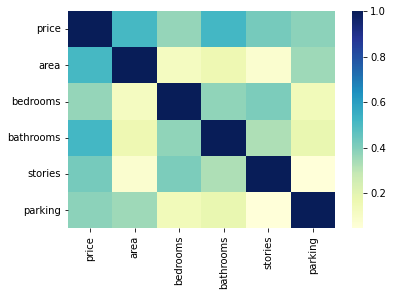

In [14]:
lodging_quantized = lodging1.select_dtypes(include=['int64', 'float64'])
lodging_cor = lodging_quantized.corr()
print(lodging_cor)
graph = sns.heatmap(lodging_cor, cmap="YlGnBu")

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

X = lodging_quantized.drop(columns=['price', 'area']) 
y = lodging_quantized['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred_linear)

print(f"Linear Regression:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")



Linear Regression:
MSE: 0.008733207579084608
RMSE: 0.09345163229759343
R-squared: 0.6752880933264422


In [42]:
threshold = lodging_quantized['price'].median()


lodging_quantized['price_binary'] = (lodging_quantized['price'] > threshold).astype(int)


X_logistic = lodging_quantized.drop(columns=['price', 'price_binary', 'area'])
y_logistic = lodging_quantized['price_binary']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_logistic, y_logistic, test_size=0.5, random_state=0)

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train_log, y_train_log)

y_pred_logistic = logistic_model.predict(X_test_log)

accuracy = accuracy_score(y_test_log, y_pred_logistic) 


print(f"Logistic Regression:")
print(f"Accuracy: {accuracy}")

Logistic Regression:
Accuracy: 0.7326007326007326
